# Week 11 - 8/1/18

**OBJECTIVES**

- Need to work a bit more on optimisation of the flux computations. $\checkmark$

**ASK TIM**

- Do we care about the diagonals in the combined matrix?
- How should we define $\epsilon$? Level by level or compared to original level?
- How should we analyse the $\epsilon$ matrix?
- Measure symmetries in the ODMs or epsilon matrices?
- Different clustering algorithms? The current one doesn't do population weighted centroids.
- How do we scale $d_{max}$?

In [1]:
%load_ext autoreload
%autoreload 2

## Optimising the ODM routines

I changed the classes to use the distance matrix rather than recalculating distance every time, this pushes some of the computation into the population object definition but saves a lot of time in total.

In [2]:
from hm.pop_models.pop_random import random as pop_random
from hm.hm_models.gravity import gravity
from hm.hm_models.radiation import radiation
import numpy as np

In [3]:
p = pop_random(100)

In [5]:
g = gravity(p, alpha=1, beta=1, gamma=2)
r = radiation(p)

In [10]:
timeit(g.ODM())

18.8 ms ± 309 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
timeit(r.ODM())

129 ms ± 6.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Don't think there's _much_ we can do about the gravity model ODM now, but perhaps there is with the radiation. When I use ```%prun``` it seems like the ```np.compress()``` function uses up a fair bit (as well as just ```population.py``` but I'm not sure what this refers to?). Perhaps there's a more efficient way of writing the ```s(i,j)``` function?

## Putting it all together

We've now written functions to combine all this clustering and matrix reducing. In the end we want a function which takes a population object and desired scale and returns an $\epsilon$ matrix.

We'll then need to analyse this $\epsilon$ matrix, I suppose an RMS with a $\sigma_{RMS}$ might be useful.

## More cities

I'm going to find the coordinates of more cities

In [9]:
import pandas as pd
import numpy as np
from hm.coarse_grain import clustering
from hm.pop_models.pop_explicit import explicit as pop_explicit

In [4]:
df = pd.read_csv("../../data/CDRC/england_welsh_scotland_pwc2011.csv")

### Manchester

In [5]:
man_df = df[(df['Easting'] < 395108) & (df['Easting'] > 373295)][(df['Northing'] < 407242) & (df['Northing'] > 389212)]

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [6]:
len(man_df)

815

In [10]:
x = np.array(man_df['Easting'])
y = np.array(man_df['Northing'])
m = np.array(man_df['TotPop2011'])
xy = np.array([x, y]).T
p = pop_explicit(xy, m)

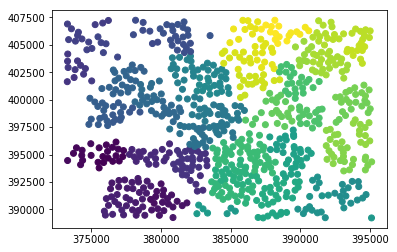

In [11]:
d_max = 1000
ManClusters = clustering.Clusters(p, d_max)
ManClusters.viz_clusters()

### Birmingham

In [12]:
bir_df = df[(df['Easting'] < 447384) & (df['Easting'] > 375647)][(df['Northing'] < 314728) & (df['Northing'] > 261315)]

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [13]:
len(bir_df)

2415

In [14]:
x = np.array(bir_df['Easting'])
y = np.array(bir_df['Northing'])
m = np.array(bir_df['TotPop2011'])
xy = np.array([x, y]).T
p = pop_explicit(xy, m)

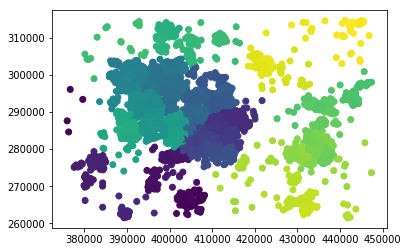

In [15]:
d_max = 1000
BirClusters = clustering.Clusters(p, d_max)
BirClusters.viz_clusters()

### Manchester & Liverpool

In [30]:
man_liv_df = df[(df['Easting'] < 411155) & (df['Easting'] > 315165)][(df['Northing'] < 427723) & (df['Northing'] > 359983)]

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [23]:
len(man_liv_df)

3705

In [24]:
x = np.array(man_liv_df['Easting'])
y = np.array(man_liv_df['Northing'])
m = np.array(man_liv_df['TotPop2011'])
xy = np.array([x, y]).T
p = pop_explicit(xy, m)

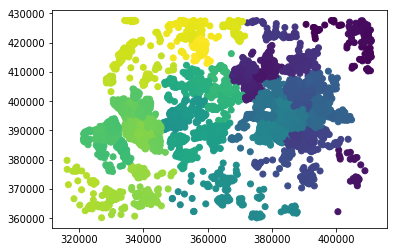

In [25]:
d_max = 1000
ManLivClusters = clustering.Clusters(p, d_max)
ManLivClusters.viz_clusters()

### 'The North'

In [28]:
north_df = df[(df['Easting'] < 545658) & (df['Easting'] > 315165)][(df['Northing'] < 481977) & (df['Northing'] > 349692)]

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [29]:
len(north_df)

8445

In [31]:
x = np.array(north_df['Easting'])
y = np.array(north_df['Northing'])
m = np.array(north_df['TotPop2011'])
xy = np.array([x, y]).T
p = pop_explicit(xy, m)

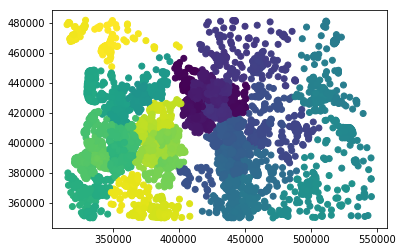

In [32]:
d_max = 1000
NorthClusters = clustering.Clusters(p, d_max)
NorthClusters.viz_clusters()

### Bristol & Bath

In [33]:
bris_bath_df = df[(df['Easting'] < 384235) & (df['Easting'] > 340217)][(df['Northing'] < 190238) & (df['Northing'] > 155072)]

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [34]:
len(bris_bath_df)

622

In [35]:
x = np.array(north_df['Easting'])
y = np.array(north_df['Northing'])
m = np.array(north_df['TotPop2011'])
xy = np.array([x, y]).T
p = pop_explicit(xy, m)

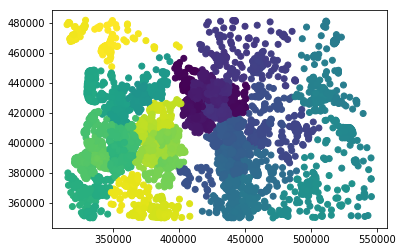

In [36]:
d_max = 1000
BrisBathClusters = clustering.Clusters(p, d_max)
BrisBathClusters.viz_clusters()

## Predicting computation time

Would be good to have an idea how long the computations will take for a given number of locations.

### Gravity

In [51]:
from hm.pop_models.pop_random import random as pop_random
from hm.hm_models.gravity import gravity
import numpy as np
from matplotlib import pyplot as plt

In [40]:
p1 = pop_random(100)
p2 = pop_random(200)
p3 = pop_random(400)
p4 = pop_random(800)

In [41]:
g1 = gravity(p1,1,1,2)
g2 = gravity(p2,1,1,2)
g3 = gravity(p3,1,1,2)
g4 = gravity(p4,1,1,2)

In [49]:
%timeit g1.ODM()
%timeit g2.ODM()
%timeit g3.ODM()
%timeit g4.ODM()

20.7 ms ± 469 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
79.8 ms ± 4.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
308 ms ± 4.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.23 s ± 8.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
y = np.array([20.7, 79.8, 308, 1230])
x = np.array([100, 200, 400, 800])
logx = np.log(x)
logy = np.log(y)

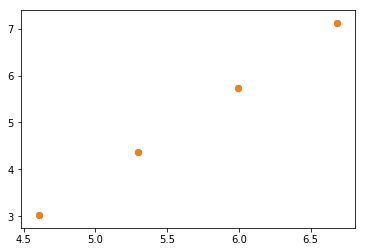

In [53]:
plt.scatter(logx, logy)
plt.show()

In [54]:
np.polyfit(logx, logy, 1)

array([ 1.96271209, -6.01566413])

Need to finish this analysis.

## Looking into Ilaria's grouped epsilon functions

In [2]:
import pandas as pd
import numpy as np
from hm.analysis.scaling import eps_scale
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("../../data/CDRC/england_welsh_scotland_pwc2011.csv")
lon_df = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [18]:
eps_matrix = eps_scale.epsilon(lon_df, 5000, 1)

/Users/JBremner/Documents/Docs/Imperial/Msci Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/JBremner/Documents/Docs/Imperial/Msci Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


In [15]:
%timeit np.array(df)[:,5]
%timeit np.array(df['Easting'])

12.6 ms ± 609 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
30.1 µs ± 784 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


should probably use the latter then, won't make a huuuge difference though.

In [19]:
df.ix[:,2].head()

0    872
1    836
2    643
3    580
4    644
Name: TotPop2011, dtype: int64

As a general point, it'd make more sense to define $\epsilon$ as a comparison to the combined flows between the original locations? 

Anyway, let's test whether my changes still work.


In [19]:
eps_matrix

array([[ 0.        , -1.66723412,  0.48553835, ...,  0.3985636 ,
         0.61813362,  0.14823432],
       [-1.69344718,  0.        , -2.80897207, ..., -3.42779092,
        -1.81453811, -5.28143833],
       [ 0.47997795, -2.80899439,  0.        , ...,  0.14410958,
         0.45622117, -0.21350402],
       ..., 
       [ 0.40640853, -3.32585598,  0.16421449, ...,  0.        ,
         0.37495432, -0.39643507],
       [ 0.63091512, -1.69271508,  0.48009442, ...,  0.38728989,
         0.        ,  0.13145651],
       [ 0.1871058 , -4.93443553, -0.14559673, ..., -0.35216599,
         0.14236212,  0.        ]])

In [21]:
eps_matrix.shape

(82, 82)

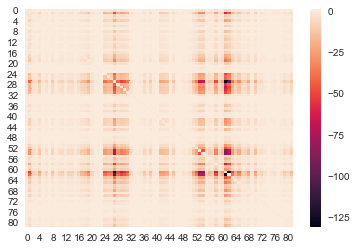

In [20]:
sns.heatmap(eps_matrix)
plt.show()

In [82]:
from hm.analysis.scaling.matrix_analysis import rms_eps, sigma_eps

In [30]:
rms_eps(eps_matrix)

8.3412539860334043

In [88]:
sigma_eps(eps_matrix)

8.0118033186375524

## More realistic clustering

In [4]:
from hm.analysis.scaling.eps_scale import *
from hm.coarse_grain.clustering import *
from hm.pop_models.pop_explicit import explicit as pop_explicit

In [90]:
levels = iterate(lon_df, 300, 2)
[len(l.clusters) for l in levels]

[6061, 5184]

In [91]:
p_clustered = (6061-5184)/6061
print('Proportion of locations clustered:', p_clustered)

Proportion of locations clustered: 0.1446955947863389


In [ ]:
eps_matrix2 = eps_scale.epsilonB(lon_df, 300, 1)

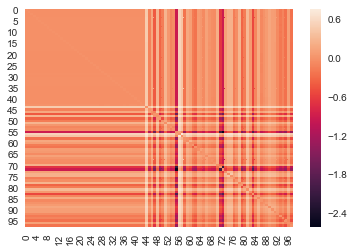

In [93]:
sns.heatmap(eps_matrix2)
plt.show()

In [94]:
rms_eps(eps_matrix2)

0.30951967982477208

In [96]:
sigma_eps(eps_matrix2)

0.30745430042730054